In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install matplotlib.pyplot

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for matplotlib.pyplot


In [5]:
pip install cv2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


In [6]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for glob


In [8]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [9]:
train_path="DATASET/TRAIN"
test_path="DATASET/TEST"

In [10]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [11]:
# visualization
x_data=[]
y_data=[]
for category in glob(train_path+"/*"):
    for file in tqdm(glob(category+"/*")):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        img_array=cv2.resize(img_array,(224,224))
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])
data = pd.DataFrame({"image":x_data,"label":y_data})

100%|██████████| 9999/9999 [00:34<00:00, 289.47it/s]


In [12]:
data.shape

(22564, 2)

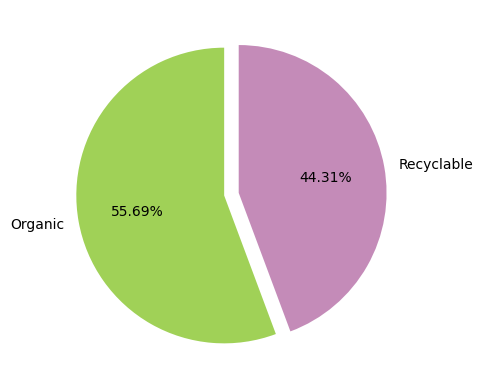

In [13]:
colors=['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.05,0.05])
plt.show()

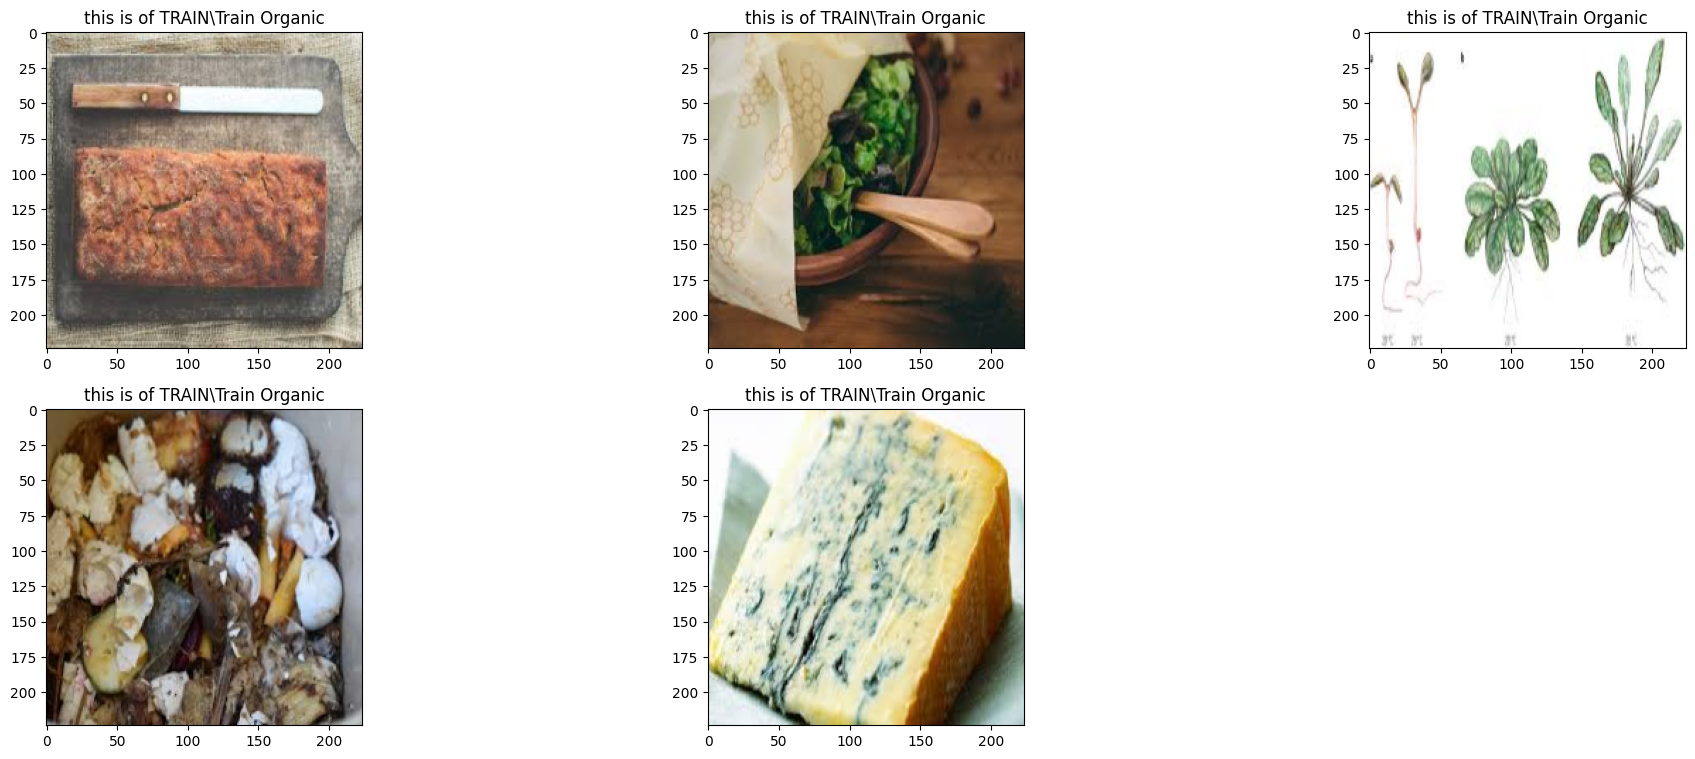

In [14]:
plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(4, 3, (i%12) + 1)
    index = np.random.randint(15000)
    plt.title("this is of {0}".format(data['label'][index]))
    plt.imshow(data['image'][index])
    plt.tight_layout()

## CNN - Convolutional Neural Networks

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3),input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
train_datagen =ImageDataGenerator(rescale=1./255)

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator =train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=256, color_mode='rgb', class_mode='categorical')
test_generator =test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=256, color_mode='rgb', class_mode='categorical')

Found 22564 images belonging to 2 classes.
Found 2511 images belonging to 2 classes.


In [20]:
hist=model.fit(
    train_generator,epochs=10,validation_data=test_generator
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 1361s 15s/step - accuracy: 0.7238 - loss: 0.6024 - val_accuracy: 0.8753 - val_loss: 0.3471
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 714s 8s/step - accuracy: 0.8277 - loss: 0.4228 - val_accuracy: 0.8746 - val_loss: 0.3235
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 879s 10s/step - accuracy: 0.8446 - loss: 0.3829 - val_accuracy: 0.8957 - val_loss: 0.2719
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 826s 9s/step - accuracy: 0.8639 - loss: 0.3371 - val_accuracy: 0.8905 - val_loss: 0.2729
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 830s 9s/step - accuracy: 0.8745 - loss: 0.3164 - val_accuracy: 0.8550 - val_loss: 0.3258
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 804s 9s/step - accuracy: 0.8801 - loss: 0.2956 - val_accuracy: 0.9012 - val_loss: 0.2532
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 904s 10s/step - accuracy: 0.9061 - loss: 0.2462 - val_accuracy: 0.9024 - val_loss: 0.2509
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 820s 9s/step - accuracy: 0.9143 - loss: 0.2250 - val_accuracy: 0.8957

In [21]:
model.save("CNN.h5")

In [27]:
from tensorflow.keras.models import load_model
model= load_model("CNN.h5")

In [28]:
data_path=(r"C:\Users\DELL\OneDrive\Desktop\organic.jpeg")

In [29]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img = tf.io.read_file(data_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (224, 224))  # Resize to match model input
img = np.expand_dims(img, axis=0)  # Add batch dimension

# Normalize the image
img = img / 255.0

# Prediction
pred = model.predict(img)

# Extract the class with the highest probability
predicted_class = np.argmax(pred, axis=1)
class_labels = ['Organic', 'Recyclable']  # Assuming two classes as per your data
result = class_labels[predicted_class[0]]

print(f"Predicted Class: {result}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 557ms/step
Predicted Class: Organic
